In [1]:
print("hello, world")

hello, world


In [2]:
import akshare as ak

In [3]:
sw_index_spot_df = ak.sw_index_spot()
print(sw_index_spot_df)

      指数代码  指数名称       昨收盘       今开盘             成交额       最高价       最低价  \
0   801010  农林牧渔   4374.91   4371.87   41047558658.0   4371.92   4243.65   
1   801020    采掘   2507.44   2512.71   14863268785.0   2523.99   2478.31   
2   801030    化工   3864.28   3867.74   71236316699.0   3875.86   3801.02   
3   801040    钢铁   2325.36   2314.35    8255089403.0   2328.85   2276.03   
4   801050  有色金属   4537.46   4574.75   76807328716.0   4574.81   4365.76   
5   801080    电子   4931.92   4942.01  117778334358.0   4970.61   4914.86   
6   801110  家用电器  10733.27  10695.08   18464629861.0  10783.61  10551.95   
7   801120  食品饮料  31514.54  31508.48   86354596853.0  31638.43  30323.72   
8   801130  纺织服装   1704.00   1698.17    6435858313.0   1714.81   1672.36   
9   801140  轻工制造   2645.28   2645.52   16304458145.0   2677.17   2615.59   
10  801150  医药生物  12415.75  12424.56   87593676008.0  12524.58  12321.80   
11  801160  公用事业   1961.69   1955.55   22048917097.0   1977.62   1943.58   
12  801170  

In [8]:
print(ak.sw_index_daily_indicator(index_code="801150",start_date="2020-01-01", end_date="2020-12-31", data_type="Week"))

   index_code index_name       date     close  volume chg_pct turn_rate  \
0      801150       医药生物 2020-12-25  12037.96  150.89    1.10    1.0979   
1      801150       医药生物 2020-12-18  11907.55  136.16    4.25    1.2750   
2      801150       医药生物 2020-12-11  11422.07  131.71   -2.14    1.4796   
3      801150       医药生物 2020-12-04  11671.55  125.90    5.98    1.1923   
4      801150       医药生物 2020-11-27  11012.48  115.04   -2.92    0.8737   
5      801150       医药生物 2020-11-20  11343.35  118.24   -1.43    0.9841   
6      801150       医药生物 2020-11-13  11507.51  143.71   -1.23    0.9887   
7      801150       医药生物 2020-11-06  11650.76  142.03   -1.36    1.4498   
8      801150       医药生物 2020-10-30  11810.92  140.07    2.79    1.5464   
9      801150       医药生物 2020-10-23  11490.44  143.42   -6.24    1.2179   
10     801150       医药生物 2020-10-16  12254.87  168.80    3.23    1.5626   
11     801150       医药生物 2020-10-09  11871.21   29.55    2.86    1.3863   
12     801150       医药生物 

In [5]:
import matplotlib.pyplot as plt

def draw_index(code):
    sw_index_df = ak.sw_index_daily_indicator(index_code=code,start_date="2020-01-01", end_date="2020-12-31", data_type="Week")
    init_price = float(sw_index_df.iloc[-1].at['close'])
    sw_index_df['relate_price'] = sw_index_df['close'].astype('float').apply(lambda x: (x-init_price)/init_price)
    plt.plot(sw_index_df['date'], sw_index_df['relate_price'])

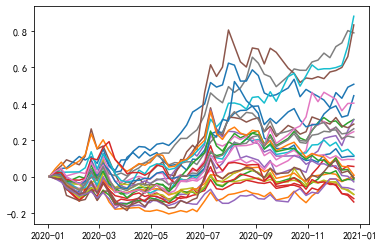

In [6]:
sw_index_spot_df = ak.sw_index_spot()

for code in sw_index_spot_df['指数代码']:
    draw_index(code)

plt.show()


In [34]:
import pandas as pd

tmp = pd.DataFrame()

for code in sw_index_spot_df['指数代码']:
    sw_index_df = ak.sw_index_daily_indicator(index_code=code,start_date="2019-12-31", end_date="2021-01-01", data_type="Month")
    init_price = float(sw_index_df.iloc[-1].at['close'])
    sw_index_df['relate_price'] = sw_index_df['close'].astype('float').apply(lambda x: (x-init_price)/init_price)
    tmp[sw_index_df.iloc[-1].at['index_name']] = sw_index_df['relate_price']
    # tmp.set_index(sw_index_df['date'], inplace=True)

tmp = tmp.iloc[::-1].reset_index(drop=True).T

print(tmp)





       0         1         2         3         4         5         6   \
农林牧渔  0.0  0.039122  0.156540  0.152888  0.102352  0.169801  0.359666   
采掘    0.0 -0.115213 -0.172189 -0.179194 -0.185209 -0.186172 -0.085812   
化工    0.0 -0.003066 -0.087505 -0.044350 -0.034022  0.028426  0.215886   
钢铁    0.0 -0.103521 -0.120325 -0.095649 -0.110845 -0.100502 -0.049278   
有色金属  0.0 -0.032653 -0.134745 -0.117690 -0.081341 -0.038447  0.156700   
电子    0.0  0.196852 -0.047756  0.061029  0.044701  0.244872  0.379476   
家用电器  0.0 -0.056991 -0.159324 -0.094979 -0.039394 -0.016294  0.090318   
食品饮料  0.0 -0.081295 -0.042147  0.040822  0.135249  0.232771  0.445871   
纺织服装  0.0  0.004178 -0.036181 -0.086637 -0.090820 -0.059395 -0.005178   
轻工制造  0.0 -0.024668 -0.076840 -0.070269 -0.012541  0.021976  0.178210   
医药生物  0.0  0.071230  0.083914  0.142804  0.200221  0.402810  0.621930   
公用事业  0.0 -0.062347 -0.077349 -0.059687 -0.079766 -0.055791  0.031058   
交通运输  0.0 -0.122305 -0.149271 -0.115897 -0.113957 -

In [36]:
print(tmp.sort_values(by=10))

       0         1         2         3         4         5         6   \
房地产   0.0 -0.083955 -0.141071 -0.104743 -0.132455 -0.092188 -0.023761   
通信    0.0  0.127047  0.037611  0.056855 -0.005009  0.072647  0.107829   
纺织服装  0.0  0.004178 -0.036181 -0.086637 -0.090820 -0.059395 -0.005178   
银行    0.0 -0.101402 -0.147952 -0.112357 -0.131946 -0.139701 -0.130886   
建筑装饰  0.0 -0.043502 -0.038059 -0.033344 -0.069336 -0.077023  0.022397   
采掘    0.0 -0.115213 -0.172189 -0.179194 -0.185209 -0.186172 -0.085812   
交通运输  0.0 -0.122305 -0.149271 -0.115897 -0.113957 -0.101398 -0.026823   
公用事业  0.0 -0.062347 -0.077349 -0.059687 -0.079766 -0.055791  0.031058   
钢铁    0.0 -0.103521 -0.120325 -0.095649 -0.110845 -0.100502 -0.049278   
非银金融  0.0 -0.083706 -0.157998 -0.122901 -0.162927 -0.116977  0.022863   
商业贸易  0.0 -0.067984 -0.017850 -0.012515  0.059032  0.155104  0.280867   
综合    0.0  0.052215 -0.025021  0.000212  0.006314  0.076090  0.205277   
计算机   0.0  0.191695  0.039024  0.117557  0.092338  